In [1]:
#Trying to write well commented code for future use
#1Red_Wine_quality

#Importing the basics
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

In [8]:
#Importing data and displaying first few lines of the file
data_wine= pd.read_csv("winequality-red.csv")
data_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [9]:
#Description and information about the dataset
data_wine.info()
data_wine.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


<AxesSubplot:xlabel='quality', ylabel='fixed acidity'>

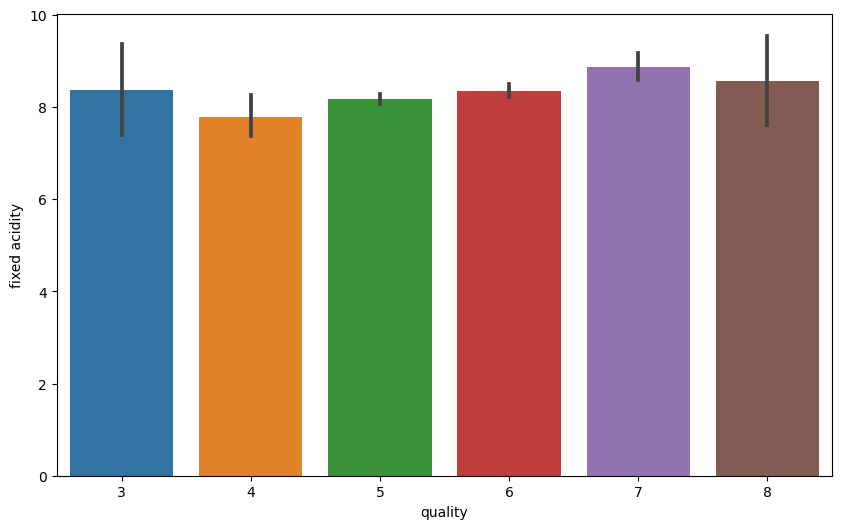

In [10]:
#EDA - Exploratory Data Analysis
#Pictures convey more information than words
#Quality vs Fixed Acidity bar graph
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'fixed acidity', data =data_wine )
#There is no clear trend here

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

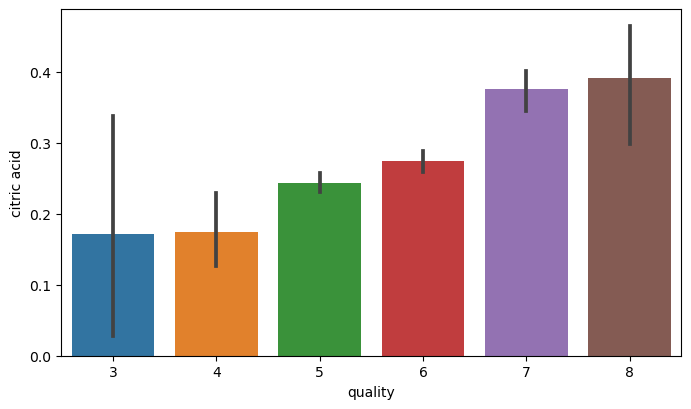

In [15]:
#Quality vs citric acid 
#There is an increasing trend here
fig = plt.figure(figsize = (8,4.5))
sns.barplot(x = 'quality', y = 'citric acid', data =data_wine )

<AxesSubplot:xlabel='quality', ylabel='residual sugar'>

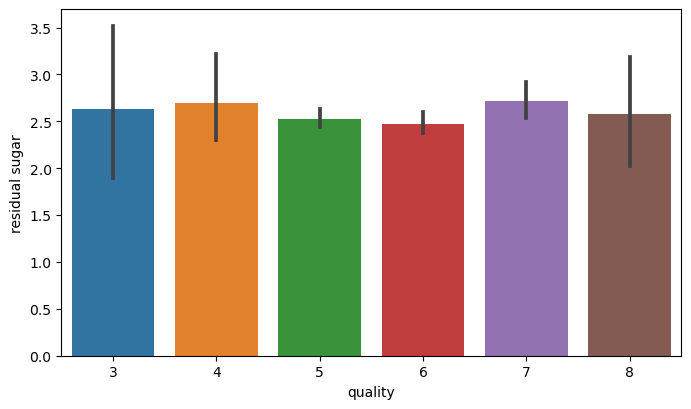

In [16]:
#Quality vs Residual sugar
#No clear trend
fig = plt.figure(figsize = (8,4.5))
sns.barplot(x = 'quality', y = 'residual sugar', data =data_wine )

<AxesSubplot:xlabel='quality', ylabel='chlorides'>

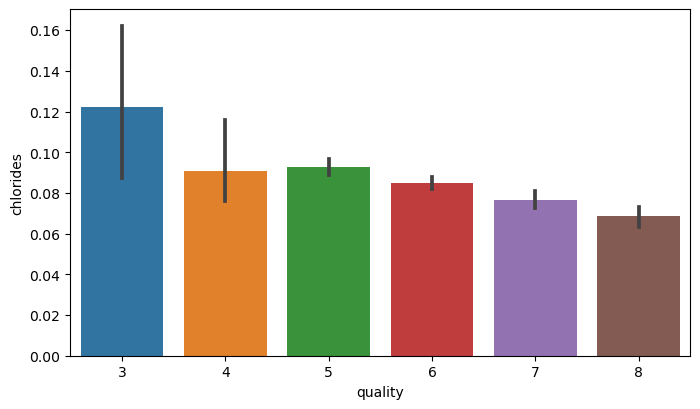

In [17]:
#Quality vs Chlorides
#Decreasing trend
fig = plt.figure(figsize = (8,4.5))
sns.barplot(x = 'quality', y = 'chlorides', data =data_wine )

<AxesSubplot:xlabel='quality', ylabel='free sulfur dioxide'>

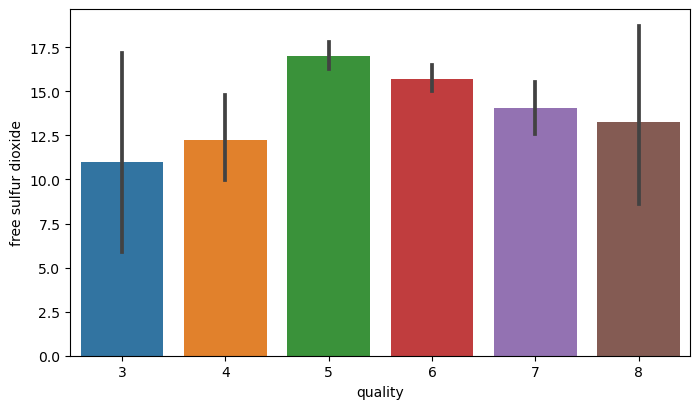

In [18]:
#Quality vs Free sulphur dioxide
#Looks like a normal distribution, but no clear trend here
fig = plt.figure(figsize = (8,4.5))
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data =data_wine )

<AxesSubplot:xlabel='quality', ylabel='total sulfur dioxide'>

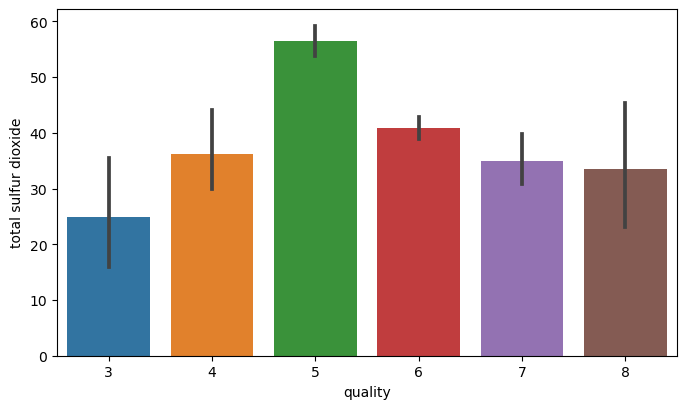

In [19]:
#Quality vs Total sulphur dioxide
#Looks like a normal distribution, but no clear trend here
fig = plt.figure(figsize = (8,4.5))
sns.barplot(x = 'quality', y = 'total sulfur dioxide', data =data_wine )

<AxesSubplot:xlabel='quality', ylabel='density'>

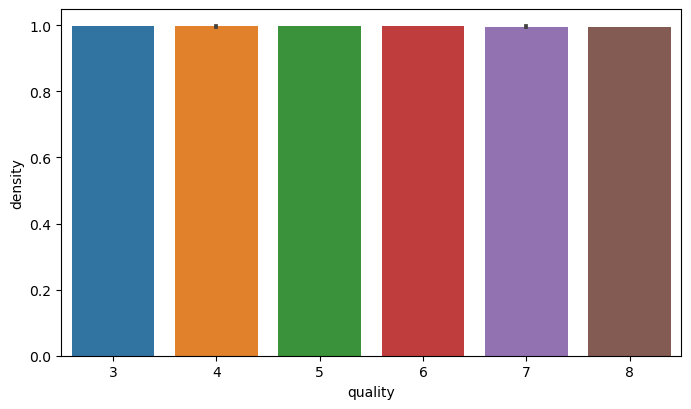

In [20]:
#Quality vs Density
#There is no relation between density and quality of the wine
fig = plt.figure(figsize = (8,4.5))
sns.barplot(x = 'quality', y = 'density', data =data_wine )

<AxesSubplot:xlabel='quality', ylabel='pH'>

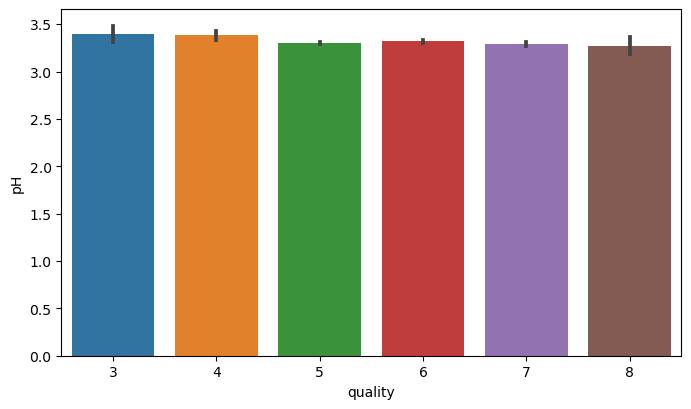

In [21]:
#Quality vs Ph 
#Very slight decreasing trend, but its not significant
fig = plt.figure(figsize = (8,4.5))
sns.barplot(x = 'quality', y = 'pH', data =data_wine )

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

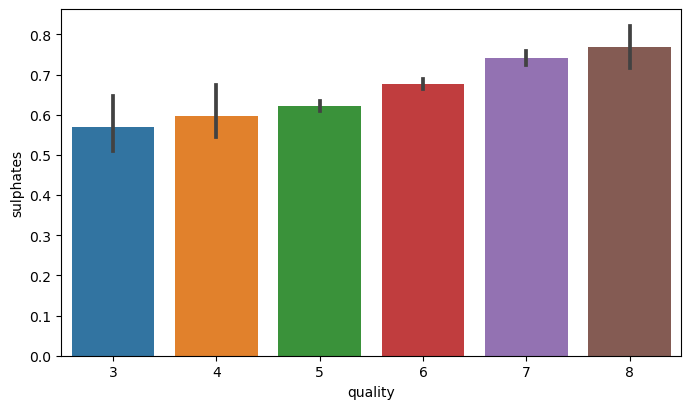

In [22]:
#Quality vs Sulphates
#Increasing trend
fig = plt.figure(figsize = (8,4.5))
sns.barplot(x = 'quality', y = 'sulphates', data =data_wine )

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

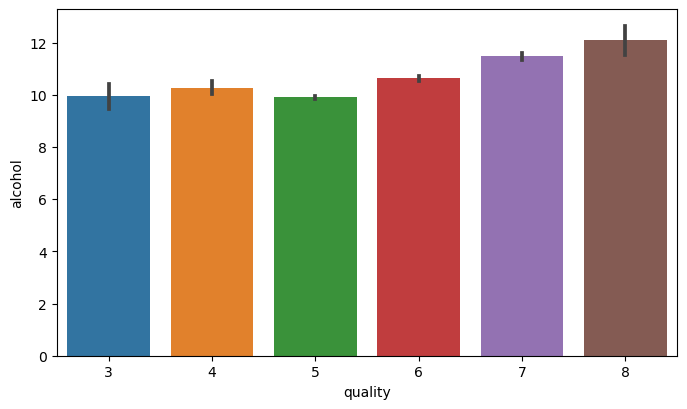

In [23]:
#Quality vs Alcohol
#Increasing trend
fig = plt.figure(figsize = (8,4.5))
sns.barplot(x = 'quality', y = 'alcohol', data =data_wine )

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

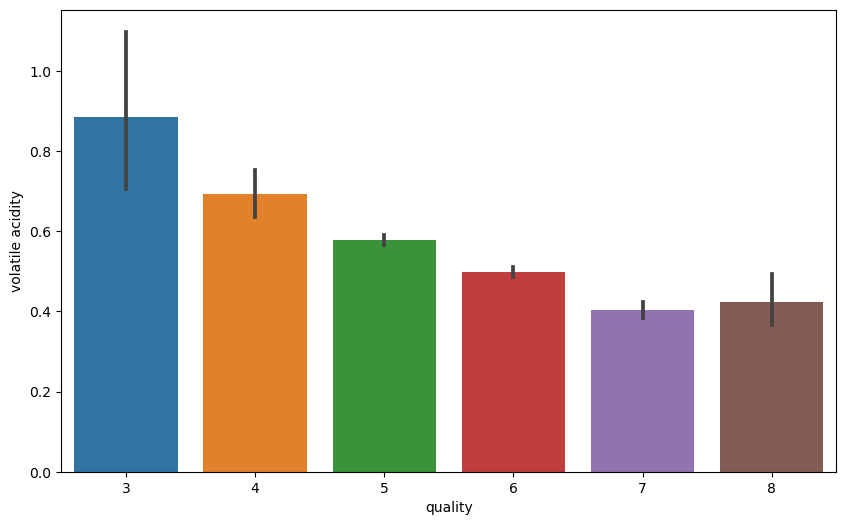

In [24]:
#Quality vs Volatile acidity
#Decreasing trend
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'volatile acidity', data =data_wine )

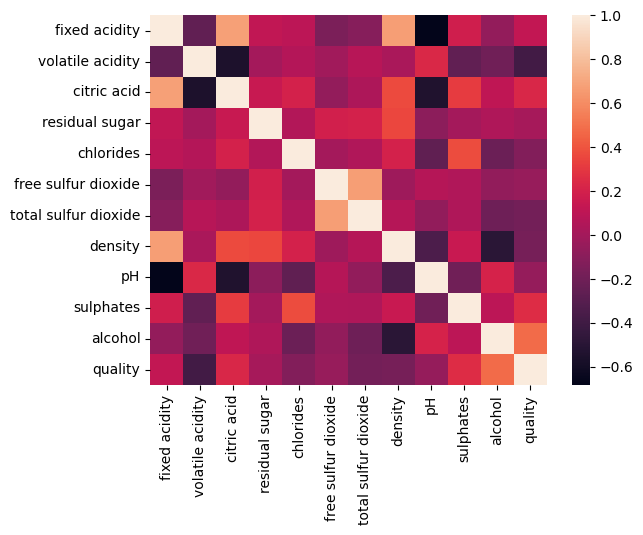

In [25]:
#Finding correlations between the features
data_wine.corr()
correlations = data_wine.corr()['quality'].drop('quality')
correlations
#Heatmap shows the correlations in a pretty diagram
sns.heatmap(data_wine.corr())
plt.show()

In [32]:
data_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   fixed acidity         1599 non-null   float64 
 1   volatile acidity      1599 non-null   float64 
 2   citric acid           1599 non-null   float64 
 3   residual sugar        1599 non-null   float64 
 4   chlorides             1599 non-null   float64 
 5   free sulfur dioxide   1599 non-null   float64 
 6   total sulfur dioxide  1599 non-null   float64 
 7   density               1599 non-null   float64 
 8   pH                    1599 non-null   float64 
 9   sulphates             1599 non-null   float64 
 10  alcohol               1599 non-null   float64 
 11  quality               1599 non-null   category
dtypes: category(1), float64(11)
memory usage: 139.2 KB


In [38]:
for i in data_wine['quality']:
    print(i)

bad
bad
bad
bad
bad
bad
bad
good
good
bad
bad
bad
bad
bad
bad
bad
good
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
good
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
good
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
good
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
good
bad
good
bad
bad
bad
bad
good
good
bad
bad
good
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
good
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
good
good
bad
ba

In [35]:
bins = (2, 6, 8)
for i in data_wine['quality']:
group_names = ['bad', 'good']
data_wine['quality'] = pd.cut(data_wine['quality'], bins = bins, labels = group_names)

TypeError: '<' not supported between instances of 'int' and 'str'

In [39]:
label_quality = LabelEncoder()

In [41]:
data_wine['quality'] = label_quality.fit_transform(data_wine['quality'])

In [42]:
data_wine['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

C:\Users\sanja\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='quality', ylabel='count'>

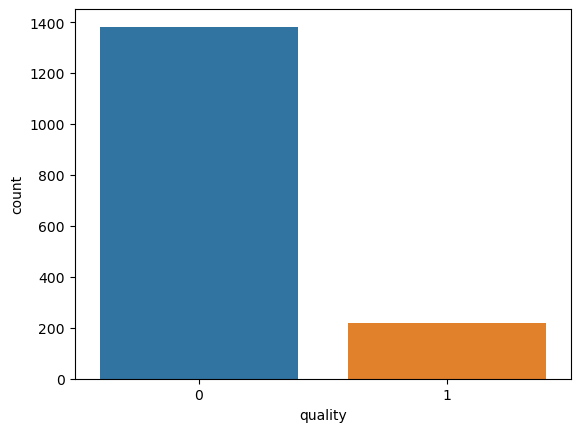

In [44]:
sns.countplot(data_wine['quality'])

In [47]:
X = data_wine.drop('quality', axis = 1)
y = data_wine['quality']

In [48]:
sc = StandardScaler()

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [51]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [53]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

In [54]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       273
           1       0.63      0.36      0.46        47

    accuracy                           0.88       320
   macro avg       0.76      0.66      0.69       320
weighted avg       0.86      0.88      0.86       320



In [27]:
#def get_features(correlation_threshold):
#    abs_corrs = correlations.abs()
#    high_correlations = abs_corrs
#    [abs_corrs > correlation_threshold].index.values.tolist()
#    return high_correlations
#features = get_features(0.05)*/

AttributeError: 'list' object has no attribute 'values'

In [28]:
abs_corrs = correlations.abs()
abs_corrs

fixed acidity           0.124052
volatile acidity        0.390558
citric acid             0.226373
residual sugar          0.013732
chlorides               0.128907
free sulfur dioxide     0.050656
total sulfur dioxide    0.185100
density                 0.174919
pH                      0.057731
sulphates               0.251397
alcohol                 0.476166
Name: quality, dtype: float64

In [ ]:
abs_corrs = correlations.abs()
abs_corrs

   
    

In [ ]:
correlation_threshold = 0.5
[abs_corrs > correlation_threshold].index.values.tolist()

In [ ]:
 high_correlations = abs_corrs